# Virtual Environment and Requests Module

In [2]:
# sending a request and logging the response code
import requests

r = requests.get("https://api.github.com/users/Connor-SM")
print(r)
print(type(r))

<Response [200]>
<class 'requests.models.Response'>


In [3]:
# accessing the content that we requested from the URL

data = r.content

print(data)

b'{"login":"Connor-SM","id":20958711,"node_id":"MDQ6VXNlcjIwOTU4NzEx","avatar_url":"https://avatars0.githubusercontent.com/u/20958711?v=4","gravatar_id":"","url":"https://api.github.com/users/Connor-SM","html_url":"https://github.com/Connor-SM","followers_url":"https://api.github.com/users/Connor-SM/followers","following_url":"https://api.github.com/users/Connor-SM/following{/other_user}","gists_url":"https://api.github.com/users/Connor-SM/gists{/gist_id}","starred_url":"https://api.github.com/users/Connor-SM/starred{/owner}{/repo}","subscriptions_url":"https://api.github.com/users/Connor-SM/subscriptions","organizations_url":"https://api.github.com/users/Connor-SM/orgs","repos_url":"https://api.github.com/users/Connor-SM/repos","events_url":"https://api.github.com/users/Connor-SM/events{/privacy}","received_events_url":"https://api.github.com/users/Connor-SM/received_events","type":"User","site_admin":false,"name":"Connor Milliken","company":"HubSpot, Inc.","blog":"www.connormilliken.

In [4]:
# converting data from JSON into a Python dictionary and outputting all the key-value pairs

data = r.json()
for k,v in data.items():
    print("Key: {}\t Value: {}".format(k,v))
print(data["name"])

Key: login	 Value: Connor-SM
Key: id	 Value: 20958711
Key: node_id	 Value: MDQ6VXNlcjIwOTU4NzEx
Key: avatar_url	 Value: https://avatars0.githubusercontent.com/u/20958711?v=4
Key: gravatar_id	 Value: 
Key: url	 Value: https://api.github.com/users/Connor-SM
Key: html_url	 Value: https://github.com/Connor-SM
Key: followers_url	 Value: https://api.github.com/users/Connor-SM/followers
Key: following_url	 Value: https://api.github.com/users/Connor-SM/following{/other_user}
Key: gists_url	 Value: https://api.github.com/users/Connor-SM/gists{/gist_id}
Key: starred_url	 Value: https://api.github.com/users/Connor-SM/starred{/owner}{/repo}
Key: subscriptions_url	 Value: https://api.github.com/users/Connor-SM/subscriptions
Key: organizations_url	 Value: https://api.github.com/users/Connor-SM/orgs
Key: repos_url	 Value: https://api.github.com/users/Connor-SM/repos
Key: events_url	 Value: https://api.github.com/users/Connor-SM/events{/privacy}
Key: received_events_url	 Value: https://api.github.com/

In [10]:
# outputting specific key-value pairs from data
r = requests.get("https://api.github.com/search/repositories?q=language:python")

data = r.json()

print(data['total_count'])


5824657


In [9]:
# Execerise 1


# getting the number of javascript github repositories

r = requests.get('https://api.github.com/search/repositories?q=language:python')
data = r.json()
print(data["total_count"])

5771398


# Pandas 

In [12]:
# importing the pandas library

import pandas as pd

In [14]:
# using the from_dict method to convert a dictionary into a Pandas DataFrame

import random
random.seed(3)
names = ["Jess","Jordan","Sandy","Ted","Barney","Tyler","Rebecca"]
ages = [random.randint(18,35) for x in range(len(names))]

people = {"names":names, "ages":ages}

df = pd.DataFrame.from_dict(people)
print(df)

     names  ages
0     Jess    25
1   Jordan    35
2    Sandy    22
3      Ted    29
4   Barney    33
5    Tyler    20
6  Rebecca    18


In [15]:
# directly selecting a column in Pandas 

print(df["ages"])
print(df["ages"][3])

0    25
1    35
2    22
3    29
4    33
5    20
6    18
Name: ages, dtype: int64
29


In [16]:
# directly selecting a record in Pandas using .loc

print(df.loc[0])
print(df.loc[0]["names"])

names    Jess
ages       25
Name: 0, dtype: object
Jess


In [17]:
# slicing a DataFrame to grab specific records

print(df[2:5])

    names  ages
2   Sandy    22
3     Ted    29
4  Barney    33


In [18]:
# accessing the top 5 records using .head()
df.head(5)

,names,ages
0,Jess,25
1,Jordan,35
2,Sandy,22
3,Ted,29
4,Barney,33


In [19]:
# accessing the bottom 3 records using .tail()
df.tail(3)

,names,ages
4,Barney,33
5,Tyler,20
6,Rebecca,18


In [20]:
# accessing the column headers (keys) using the .keys() method

headers = df.keys()
print(headers)

Index(['names', 'ages'], dtype='object')


In [21]:
# checking the shape, which is the number of records and columns
print(df.shape)

(7, 2)


In [22]:
# checking the general statistics of the DataFrame using .describe(), only works on numerical columns
df.describe()

,ages
count,7.000000
mean,26.000000
std,6.531973
min,18.000000
25%,21.000000
50%,25.000000
75%,31.000000
max,35.000000


In [23]:
# sort based on a given column , but keep the DataFrame in tact using sort_values()

df = df.sort_values("ages")
df.head(5)

,names,ages
6,Rebecca,18
5,Tyler,20
2,Sandy,22
0,Jess,25
3,Ted,29


In [24]:
# using a conditional to create a true/false column to work with

can_drink = df["ages"] > 21
print(can_drink)

6    False
5    False
2     True
0     True
3     True
4     True
1     True
Name: ages, dtype: bool


In [25]:
# using subsetting to filter out records and keep DataFrame intact
df[df["ages"]>21]

,names,ages
2,Sandy,22
0,Jess,25
3,Ted,29
4,Barney,33
1,Jordan,35


In [26]:
# generating a new column of fake data for each record in the DataFrame to represent customer tenure

random.seed(321)
tenure = [ random.randint(0,10) for x in range(len(df))]
df["tenure"] = tenure
df.head()

,names,ages,tenure
6,Rebecca,18,4
5,Tyler,20,6
2,Sandy,22,2
0,Jess,25,5
3,Ted,29,8


In [29]:
# feature engineering a new column from known data using UDF(user defined function)

def ageGroup(age):
    return "Teenage" if age < 21 else "Adult"
df["age_group"] = df["ages"].apply(ageGroup)
df.head(10)

,names,ages,tenure,age_group
6,Rebecca,18,4,Teenage
5,Tyler,20,6,Teenage
2,Sandy,22,2,Adult
0,Jess,25,5,Adult
3,Ted,29,8,Adult
4,Barney,33,7,Adult
1,Jordan,35,5,Adult


In [30]:
# grouping the records together to count how many records in each group
df.groupby("age_group", as_index = False).count().head()

,age_group,names,ages,tenure
0,Adult,5,5,5
1,Teenage,2,2,2


In [31]:
# grouping the data to see averages of all columns
df.groupby("age_group", as_index=False).mean().head()

,age_group,ages,tenure
0,Adult,28.8,5.4
1,Teenage,19.0,5.0


In [32]:
# grouping information by their age group, then by their tenure
df.groupby(["age_group","tenure"], as_index=False).count().head(10)

,age_group,tenure,names,ages
0,Adult,2,1,1
1,Adult,5,2,2
2,Adult,7,1,1
3,Adult,8,1,1
4,Teenage,4,1,1
5,Teenage,6,1,1


In [34]:
# adding a record to the bottom of the DataFrame
df.loc[7] = ["Jess",25,2,"Adult"]
df.head(10)

,names,ages,tenure,age_group
6,Rebecca,18,4,Teenage
5,Tyler,20,6,Teenage
2,Sandy,22,2,Adult
0,Jess,25,5,Adult
3,Ted,29,8,Adult
4,Barney,33,7,Adult
1,Jordan,35,5,Adult
7,Jess,25,2,Adult


In [36]:
# removing duplicates based on same names

df = df.drop_duplicates(subset="names")
df.head(10)

,names,ages,tenure,age_group
6,Rebecca,18,4,Teenage
5,Tyler,20,6,Teenage
2,Sandy,22,2,Adult
0,Jess,25,5,Adult
3,Ted,29,8,Adult
4,Barney,33,7,Adult
1,Jordan,35,5,Adult


In [39]:
# creating another fake DataFrame to work with, having same names and a new ratings column 

ratings = {
    "names":["Jess","Tyler","Ted"],
    "ratings":[10,9,6]
}

ratings = df.from_dict(ratings)
ratings.head()

,names,ratings
0,Jess,10
1,Tyler,9
2,Ted,6


In [40]:
# performing an inner join with our df and ratings DataFrames based on names, get data that matches

matched_ratings = df.merge(ratings, on="names",how="inner")
matched_ratings.head()

,names,ages,tenure,age_group,ratings
0,Tyler,20,6,Teenage,9
1,Jess,25,5,Adult,10
2,Ted,29,8,Adult,6


In [42]:
# performing an outer join with our df and ratings DataFrames based on names, get all data

all_ratings = df.merge(ratings, on="names",how="outer")
all_ratings

,names,ages,tenure,age_group,ratings
0,Rebecca,18,4,Teenage,NaN
1,Tyler,20,6,Teenage,9.0
2,Sandy,22,2,Adult,NaN
3,Jess,25,5,Adult,10.0
4,Ted,29,8,Adult,6.0
5,Barney,33,7,Adult,NaN
6,Jordan,35,5,Adult,NaN


In [43]:
# Execerise 2 will skip now but do on the weekend

In [101]:
# load a dataset from www.kaggle.com and display the first 5 records

# stats for NBA players

nba_df = pd.read_csv("players_stats_by_season_full_details.csv")

In [102]:
nba_df.head(5)

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school
0,NBA,2009 - 2010,Regular_Season,Kevin Durant,OKC,82,3239.3,794,1668,128,...,2472,1988.0,Sep,"Sep 29, 1988",06-Sep,206.0,240.0,109.0,United States,Montrose Christian School
1,NBA,2009 - 2010,Regular_Season,LeBron James,CLE,76,2965.6,768,1528,129,...,2258,1984.0,Dec,"Dec 30, 1984",06-Aug,203.0,250.0,113.0,United States,St. Vincent St. Mary High School
2,NBA,2009 - 2010,Regular_Season,Dwyane Wade,MIA,77,2792.4,719,1511,73,...,2045,1982.0,Jan,"Jan 17, 1982",06-Apr,193.0,220.0,100.0,United States,Harold L. Richards High School
3,NBA,2009 - 2010,Regular_Season,Dirk Nowitzki,DAL,81,3038.8,720,1496,51,...,2027,1978.0,Jun,"Jun 19, 1978",7-0,213.0,245.0,111.0,Germany,NaN
4,NBA,2009 - 2010,Regular_Season,Kobe Bryant,LAL,73,2835.4,716,1569,99,...,1970,1978.0,Aug,"Aug 23, 1978",06-Jun,198.0,212.0,96.0,United States,Lower Merion High School


In [106]:
# how many records are in the dataset
nba_df.shape
# There are 44066 records in the dataset

# What are the data types of each column
nba_df.dtypes

League          object
Season          object
Stage           object
Player          object
Team            object
GP               int64
MIN            float64
FGM              int64
FGA              int64
3PM              int64
3PA              int64
FTM              int64
FTA              int64
TOV              int64
PF               int64
ORB              int64
DRB              int64
REB              int64
AST              int64
STL              int64
BLK              int64
PTS              int64
birth_year     float64
birth_month     object
birth_date      object
height          object
height_cm      float64
weight         float64
weight_kg      float64
nationality     object
high_school     object
dtype: object

In [107]:
# Are there any duplicate records

tmp_df = nba_df[nba_df.duplicated()]
print(tmp_df)

Empty DataFrame
Columns: [League, Season, Stage, Player, Team, GP, MIN, FGM, FGA, 3PM, 3PA, FTM, FTA, TOV, PF, ORB, DRB, REB, AST, STL, BLK, PTS, birth_year, birth_month, birth_date, height, height_cm, weight, weight_kg, nationality, high_school]
Index: []

[0 rows x 31 columns]


In [110]:
# Are there any missing data?

nba_df.isnull()
# yes there are some missing fields in the highschool column 

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [112]:
# find correlation between columns

nba_df.corr()
# any values with the corr above .5 shows some correlation positive number show the variables moves together neg numbers are the inverse of each other

,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,...,DRB,REB,AST,STL,BLK,PTS,birth_year,height_cm,weight,weight_kg
GP,1.000000,0.896583,0.750446,0.770270,0.525632,0.548959,0.605640,0.618258,0.701760,0.867679,...,0.716069,0.693401,0.583380,0.686397,0.482252,0.746115,-0.104084,0.033523,0.065961,0.065805
MIN,0.896583,1.000000,0.902379,0.923021,0.633275,0.658353,0.769008,0.773942,0.841289,0.850477,...,0.811910,0.773647,0.718899,0.806618,0.504210,0.906030,-0.146146,-0.007191,0.037895,0.037689
FGM,0.750446,0.902379,1.000000,0.979472,0.568773,0.580794,0.861953,0.867088,0.835635,0.738164,...,0.830431,0.802123,0.656505,0.732255,0.543095,0.989803,-0.112171,0.089558,0.132452,0.132018
FGA,0.770270,0.923021,0.979472,1.000000,0.661108,0.687988,0.851464,0.843640,0.854055,0.736655,...,0.787187,0.742721,0.705827,0.762131,0.470951,0.983794,-0.109761,0.004561,0.051095,0.050672
3PM,0.525632,0.633275,0.568773,0.661108,1.000000,0.982437,0.459793,0.390957,0.506345,0.420238,...,0.316234,0.220582,0.559421,0.550767,0.012071,0.639462,-0.083998,-0.273251,-0.263164,-0.263229
3PA,0.548959,0.658353,0.580794,0.687988,0.982437,1.000000,0.480056,0.415867,0.544040,0.444528,...,0.335160,0.238124,0.588463,0.588251,0.018359,0.650494,-0.071960,-0.290043,-0.277763,-0.277745
FTM,0.605640,0.769008,0.861953,0.851464,0.459793,0.480056,1.000000,0.981546,0.806948,0.629242,...,0.711379,0.682195,0.634927,0.656980,0.440510,0.904202,-0.118607,0.040383,0.091755,0.090890
FTA,0.618258,0.773942,0.867088,0.843640,0.390957,0.415867,0.981546,1.000000,0.815726,0.661083,...,0.757531,0.741866,0.605565,0.659912,0.504347,0.895610,-0.109546,0.091650,0.143351,0.142584
TOV,0.701760,0.841289,0.835635,0.854055,0.506345,0.544040,0.806948,0.815726,1.000000,0.727412,...,0.706098,0.665694,0.801543,0.770848,0.402387,0.849445,-0.113771,-0.090678,-0.015643,-0.016108
PF,0.867679,0.850477,0.738164,0.736655,0.420238,0.444528,0.629242,0.661083,0.727412,1.000000,...,0.750274,0.746184,0.515800,0.677501,0.551972,0.729147,-0.123605,0.120746,0.153069,0.153018


# Matplotlib

In [44]:
# importing the matplotlib library

from matplotlib import pyplot as plt

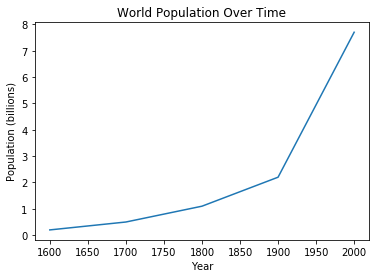

In [46]:
# creating a line plot using x and y coords

x,y = [1600,1700,1800,1900,2000] , [0.2,0.5,1.1,2.2,7.7]
plt.plot(x,y) # creates the line 
plt.title("World Population Over Time")
plt.xlabel("Year")
plt.ylabel("Population (billions)")
plt.show()

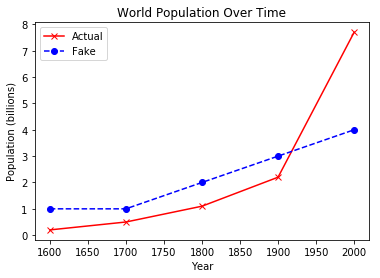

In [47]:
# creating a line plot with multiple lines

x1,y1 = [1600,1700,1800,1900,2000] , [0.2,0.5,1.1,2.2,7.7]
x2,y2 = [1600,1700,1800,1900,2000] , [1,1,2,3,4]
plt.plot(x1,y1,"rx-",label="Actual") # create a red solid line with x dots
plt.plot(x2,y2,"bo--",label="Fake") # create a blue dashed line with circle dots

plt.title("World Population Over Time")
plt.xlabel("Year")
plt.ylabel("Population (billions)")
plt.legend() #shows labels in best corner
plt.show()

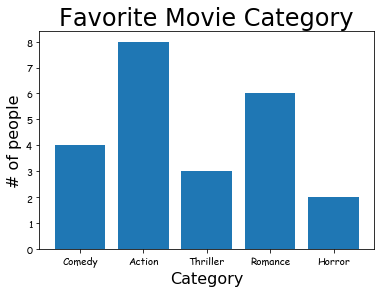

In [48]:
# creating a bar plot using x and y coords

num_people, categories = [4,8,3,6,2] , ["Comedy","Action","Thriller","Romance","Horror"]

plt.bar(categories,num_people)
plt.title("Favorite Movie Category",fontsize=24)
plt.xlabel("Category", fontsize= 16)
plt.ylabel("# of people", fontsize = 16)
plt.xticks(fontname = "Fantasy")
plt.yticks(fontname = "Fantasy")
plt.show()

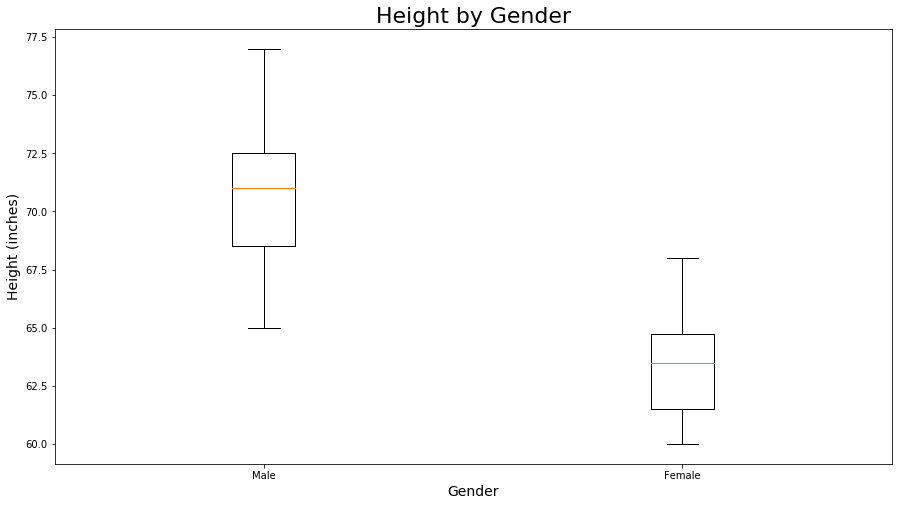

In [50]:
# creating a box plot - showing height data for male-female
males, females = [72,68,65,77,73,71,69] , [60,65,68,61,63,64]

heights = [males,females]

plt.figure(figsize=(15,8)) # makes chart bigger
plt.boxplot(heights) # takes in list of data, each box is its' own array, heights contains two lists

plt.xticks([1,2],["Male","Female"]) # sets number of ticks and labels on x-axis

plt.title("Height by Gender", fontsize = 22)
plt.ylabel("Height (inches)",fontsize = 14)
plt.xlabel("Gender",fontsize = 14)
plt.show()

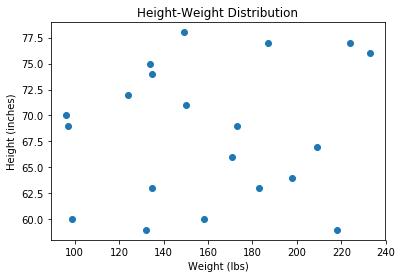

In [51]:
# creating a scatter plot to represent height-weight distribution 

from random import randint
random.seed(2)
height = [randint(58,78) for x in range(20) ] # 20 records between 4'10" and 6'6"
weight = [randint(90,250) for x in range(20)] #20 records between 901lbs. and 250lbs.

plt.scatter(weight,height)
plt.title("Height-Weight Distribution")
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (inches)")
plt.show()

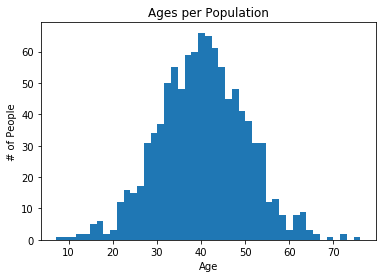

In [52]:
# creating a histogram to show age data for a fake population
import numpy as np
np.random.seed(5)
ages = [np.random.normal(loc=40,scale=10) for x in range(1000)] #ages distributed around 40
plt.hist(ages,bins=45)
plt.title("Ages per Population")
plt.xlabel("Age")
plt.ylabel("# of People")
plt.show()

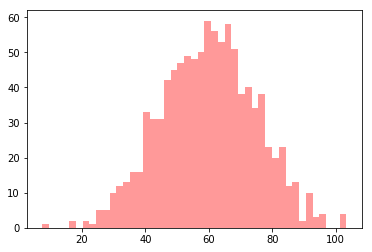

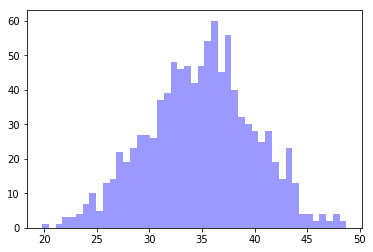

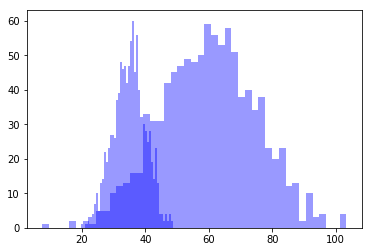

In [53]:
# showing the importance of histogram's display central distribution
florida = [np.random.normal(loc=60,scale=15) for x in range(1000)]
california = [np.random.normal(loc=35,scale=5) for x in range(1000)]

# chart 1
plt.hist(florida, bins=45, color="r",alpha=0.4) # alpha is opacity, making it see through

plt.show()

# chart 2

plt.hist(california,bins=45,color="b",alpha=0.4) # alpha is opacity, making it see through
plt.show()

# chart 3

plt.hist(florida, bins=45,color="b",alpha=0.4) # alpha is opacity, making i see through

plt.hist(california,bins=45,color="b",alpha=0.4) # alpha is opacity, making it see through

plt.show()

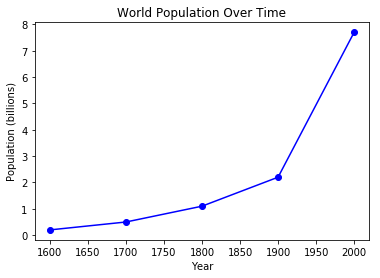

In [55]:
# using savefig method to save the chart as a jpg to the local folder

x,y = [1600,1700,1800,1900,2000] , [0.2,0.5,1.1,2.2,7.7]
plt.plot(x,y, "bo-") # creates a blue solid line with circle dots
plt.title("World Population Over Time")
plt.xlabel("Year")
plt.ylabel("Population (billions)")
plt.savefig("population.jpg")

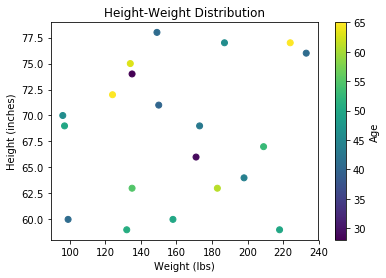

In [56]:
# creating a scatter plot to represent heigh-weight distributon

from random import randint

random.seed(2)

height = [randint(58,78) for x in range(20)]
weight = [randint(90,250) for x in range(20)]
age = [randint(18,65) for x in range(20) ]

plt.scatter(weight,height,c=age)
plt.title("Height-Weight Distribution")
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (inches)")
plt.colorbar(label="Age")
plt.show()

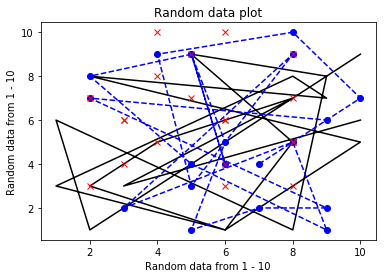

In [60]:
# Execerise 3

#Three line plot

# creating a line plot with multiple lines
from random import randint

x1,y1 = [randint(1,10) for x in range(20)] , [randint(1,10) for x in range(20)]
x2,y2 = [randint(1,10) for x in range(20)] , [randint(1,10) for x in range(20)]
x3,y3 = [randint(1,10) for x in range(20)] , [randint(1,10) for x in range(20)]
plt.plot(x1,y1,"black") 
plt.plot(x2,y2,"bo--") 
plt.plot(x3,y3,"rx")

plt.title("Random data plot")
plt.xlabel("Random data from 1 - 10")
plt.ylabel("Random data from 1 - 10")
#plt.legend() #shows labels in best corner
plt.show()


What would you rate this movie (1-5)? 3
Is there another user that would like to review(y/n)?y
What would you rate this movie (1-5)? 4
Is there another user that would like to review(y/n)?y
What would you rate this movie (1-5)? 5
Is there another user that would like to review(y/n)?y
What would you rate this movie (1-5)? 3
Is there another user that would like to review(y/n)?y
What would you rate this movie (1-5)? 2
Is there another user that would like to review(y/n)?y
What would you rate this movie (1-5)? 2
Is there another user that would like to review(y/n)?n


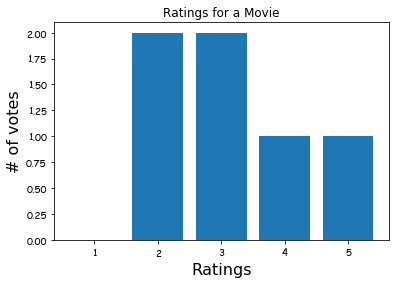

In [67]:
# User info
#num_people, categories = [4,8,3,6,2] , ["Comedy","Action","Thriller","Romance","Horror"]

#plt.bar(categories,num_people)
#plt.title("Favorite Movie Category",fontsize=24)
#plt.xlabel("Category", fontsize= 16)
#plt.ylabel("# of people", fontsize = 16)
#plt.xticks(fontname = "Fantasy")
#plt.yticks(fontname = "Fantasy")
#plt.show()

d = {}

for i in range(1,6):
    d[str(i)] = 0

while True:
    ans = input("What would you rate this movie (1-5)? ")
    if ans not in d:
        d[ans] = 1
    else:
        d[ans]+= 1
    ans = input("Is there another user that would like to review(y/n)?").lower()
    
    if ans == "n":
        break
plt.bar(["1","2","3","4","5"],d.values())
plt.title("Ratings for a Movie")
plt.xlabel("Ratings", fontsize = 16)
plt.ylabel("# of votes",fontsize=16)
plt.xticks(fontname="Fantasy")
plt.yticks(fontname="Fantasy")
plt.show()

# Web Scraping 

In [71]:
# importing the beautiful soup and requests library
from bs4 import BeautifulSoup
import requests

In [72]:
# performing a request and outputting the status code

page = requests.get("http://www.arthurleej.com/e-love.html")
print(page)

<Response [200]>


In [73]:
# outputting the request response content

print(page.content)

b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">\r<html>\r<head>\r\t<title>Essay on Love by Arthur Lee Jacobson</title>\r<meta name="description" content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson.">\r<meta name="keywords" content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington">\r<meta name="resource-type" content="document">\r<meta name="generator" content="BBEdit 4.5">\r<meta name="robots" content="all">\r<meta name="classification" content="Gardening">\r<meta name="distribution" content="global">\r<meta name="rating" content="general">\r<meta name="copyright" content="2001 Arthur Lee Jacobson">\r<meta name="author" content="eriktyme@eriktyme.com">\r<meta name="language" content="en-us">\r</head>\r<body background="images/background1a.jpg" bgcolor="#FFFFCC" text="#000000" link="#00

In [74]:
# turning the response into a BeautifulSoup object to extract data
soup = BeautifulSoup(page.content,"html.parser")
print(soup.prettify())

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<html>
 <head>
  <title>
   Essay on Love by Arthur Lee Jacobson
  </title>
  <meta content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson." name="description"/>
  <meta content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington" name="keywords"/>
  <meta content="document" name="resource-type"/>
  <meta content="BBEdit 4.5" name="generator"/>
  <meta content="all" name="robots"/>
  <meta content="Gardening" name="classification"/>
  <meta content="global" name="distribution"/>
  <meta content="general" name="rating"/>
  <meta content="2001 Arthur Lee Jacobson" name="copyright"/>
  <meta content="eriktyme@eriktyme.com" name="author"/>
  <meta content="en-us" name="language"/>
 </head>
 <body alink="#33CC33" background="images/background1a.jpg" b

In [75]:
# using the find method to scrape the text within the first bold tag

title = soup.find("b")
print(title)
print(title.get_text())

<b>Love</b>
Love


In [76]:
# get all text within the bold element tag then output each
poem_text = soup.find_all("b")
for text in poem_text:
    print(text.get_text())

Love
    Of the fourteen essays I'm writing, only this one treats an emotion. That love is the most important emotion is the deduction. I think other emotions may be as important, but are not so powerfully moving or interesting to most of us. Love is exciting. There is no need to justify choosing to write about it. Are not most songs love songs? Are not most novels stories featuring love?
    Love in its broad sense is the feeling of strong attraction, and often attachment and protection. It is felt towards other people, towards pets, towards inanimate objects, towards abstractions such as patriotism, religious matters, hobbies, and I suppose nearly everything. It is multifaceted, and includes ordinary self-love, chivalrous love, carnal or sexual love, friendly love, family love. It is an emotion that is closely related to certain others, such as hope. At its simplest level it is what we strongly like.
    I have a hunch that love, like the rose, owes much of its appeal to our mainstre

In [78]:
# finding an element by specific attribute key-value
page = requests.get("https://github.com/Connor-SM")
soup = BeautifulSoup(page.content, "html.parser")
username = soup.find("span",attrs={"class":"vcard-username"}) # find first span with this class
print(username)
print(username.get_text())

<span class="p-nickname vcard-username d-block" itemprop="additionalName">Connor-SM</span>
Connor-SM


In [79]:
# traversing through the DOM using Beautiful Soup - using the children attribute 
page = requests.get("http://www.arthurleej.com/e-love.html")
soup = BeautifulSoup(page.content, "html.parser")
print(soup.children)

In [80]:
# understanding the children within the soup object

for child in list(soup.children):
    print(type(child))

<class 'bs4.element.Doctype'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>


In [81]:
# accessing the .Tag object which holds the html - trying to access the title tag

html = list(soup.children)[2]

for section in html:
    print("\n\n Start of new section")
    print(section)



 Start of new section
 


 Start of new section
<head> <title>Essay on Love by Arthur Lee Jacobson</title> <meta content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson." name="description"/> <meta content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington" name="keywords"/> <meta content="document" name="resource-type"/> <meta content="BBEdit 4.5" name="generator"/> <meta content="all" name="robots"/> <meta content="Gardening" name="classification"/> <meta content="global" name="distribution"/> <meta content="general" name="rating"/> <meta content="2001 Arthur Lee Jacobson" name="copyright"/> <meta content="eriktyme@eriktyme.com" name="author"/> <meta content="en-us" name="language"/> </head>


 Start of new section
 


 Start of new section
<body alink="#33CC33" background="images/background1a.jpg

In [82]:
# accessing the head element using the children attribute
head = list(html.children)[1]
for item in head:
    print("\n\n New Tag")
    print(item)



 New Tag
 


 New Tag
<title>Essay on Love by Arthur Lee Jacobson</title>


 New Tag
 


 New Tag
<meta content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson." name="description"/>


 New Tag
 


 New Tag
<meta content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington" name="keywords"/>


 New Tag
 


 New Tag
<meta content="document" name="resource-type"/>


 New Tag
 


 New Tag
<meta content="BBEdit 4.5" name="generator"/>


 New Tag
 


 New Tag
<meta content="all" name="robots"/>


 New Tag
 


 New Tag
<meta content="Gardening" name="classification"/>


 New Tag
 


 New Tag
<meta content="global" name="distribution"/>


 New Tag
 


 New Tag
<meta content="general" name="rating"/>


 New Tag
 


 New Tag
<meta content="2001 Arthur Lee Jacobson" name="copyright"/>


 New Tag
 


 New Tag
<m

In [83]:
# scraping the title text
title = list(head)[1]
print(title.string) #.string is used to extract text as well
print(type(title.string)) # results in NavigableString
print(title.get_text())

Essay on Love by Arthur Lee Jacobson
<class 'bs4.element.NavigableString'>
Essay on Love by Arthur Lee Jacobson


In [85]:
# execerise 4

# word count from the webpage below 
page = requests.get("http://www.york.ac.uk/teaching/cws/wws/webpage1.html")

print(len(list(page.content)) )

4054


In [90]:
#List all the football stadiums
page = requests.get("https://en.wikipedia.org/wiki/List_of_current_National_Football_League_stadiums")
soup = BeautifulSoup(page.content,"html.parser")
NFL_text = soup.find_all("td")
arr = []
for i,text in enumerate(NFL_text):
    if i >= 298 and i <= 319:
        arr.append(text.get_text())
    #print("\n\n{}".format(i))
    #print(text.get_text())
print(arr)
for x in arr:
    print(x)


['East', 'North', 'South', 'West', '\nBills Stadium (Buffalo Bills)\nHard Rock Stadium (Miami Dolphins)\nGillette Stadium (New England Patriots)\nMetLife Stadium1 (New York Jets)\n', '\nM&T Bank Stadium (Baltimore Ravens)\nFirstEnergy Stadium (Cleveland Browns)\nPaul Brown Stadium (Cincinnati Bengals)\nHeinz Field (Pittsburgh Steelers)\n', '\nNRG Stadium (Houston Texans)\nLucas Oil Stadium (Indianapolis Colts)\nTIAA Bank Field (Jacksonville Jaguars)\nNissan Stadium (Tennessee Titans)\n', '\nEmpower Field at Mile High (Denver Broncos)\nArrowhead Stadium (Kansas City Chiefs)\nAllegiant Stadium (Las Vegas Raiders)\nSoFi Stadium2  (Los Angeles Chargers)\n', "EastNorthSouthWest\nAT&T Stadium (Dallas Cowboys)\nMetLife Stadium1 (New York Giants)\nLincoln Financial Field (Philadelphia Eagles)\nFedExField (Washington Football Team)\n\nSoldier Field (Chicago Bears)\nFord Field (Detroit Lions)\nLambeau Field (Green Bay Packers)\nU.S. Bank Stadium (Minnesota Vikings)\n\nMercedes-Benz Stadium (Atla

# Friday Project: Website Analysis

In [91]:
# import all necessary libraries

import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from bs4.element import Comment
from IPython.display import clear_output

Enter a website to analyze: https://www.microsoft.com/en-us/
The Top word is Microsoft


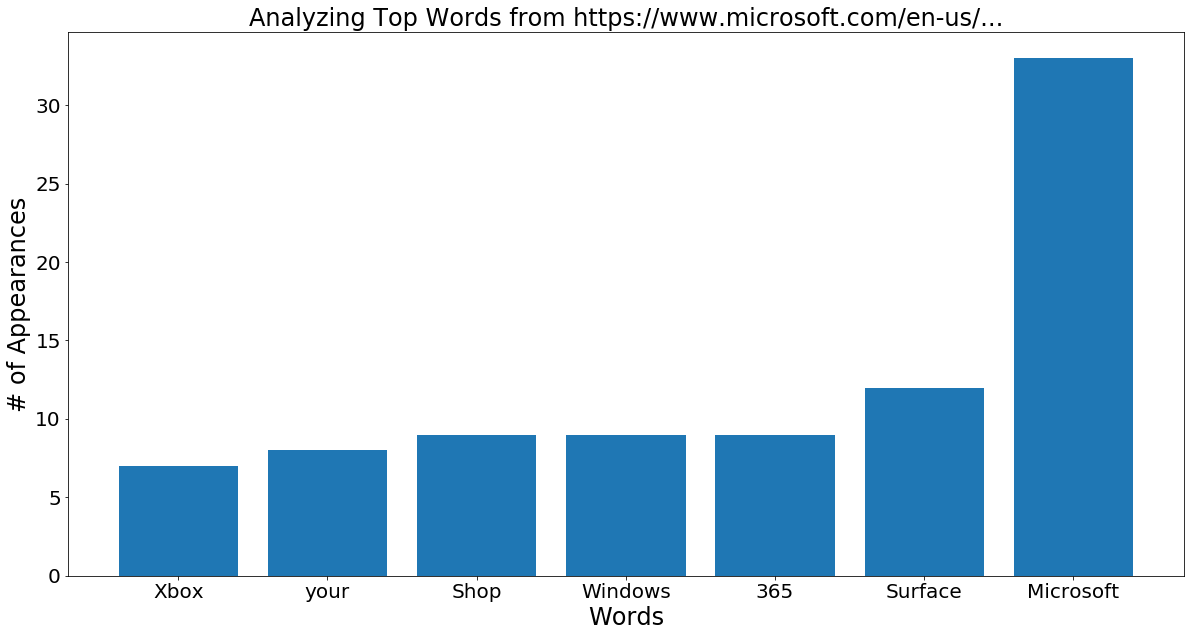

Would you like to scrape a website (y/n)? n


In [100]:
# graph results of top 7 words

def displayResults(words,site):
    count = [item[1] for item in words][::-1]
    word = [item[0] for item in words][::-1]
    plt.figure(figsize=(20,10))
    plt.bar(word,count)
    plt.title("Analyzing Top Words from {}...".format(site[:50]), fontname = "Sans Serif",fontsize = 24)
    plt.xlabel("Words",fontsize=24)
    plt.ylabel("# of Appearances",fontsize = 24)
    plt.xticks(fontname = "Sans Serif",fontsize= 20)
    plt.yticks(fontname= "Sans Serif",fontsize = 20)
    plt.show()

# filter article words and hidden characters
def filterWaste(word):
    bad_words = ("the","a","in","of","to","you","\xa0","and","at","on","for","from","is","that","his","are","be","-","as","&","they","with","how","was","her","him","i","has","|")
    if word.lower() in bad_words:
        return False
    else:
        return True



# filter out all elements that do not contain text that appears on site

def filterTags(element):
    if element.parent.name in ["style","script","head","title","meta","[document]"]:
        return False
    if isinstance(element,Comment):
        return False
    return True

# request site and return top 7 most used words

def scrape(site):
    page = requests.get(site)
    soup = BeautifulSoup(page.content,"html.parser")
    #print(soup.prettify())
    text = soup.find_all(text=True) # will get all text within the document
    #print(text)
    visible_text = filter(filterTags,text)
    word_count = {}
    for text in visible_text:
        #print(text)
        words = text.replace("\n","").replace("\t","").split(" ") # replace all hidden chars
        words = list(filter(filterWaste,words))
        for word in words:
            #print(word,end = " ") # remove after runs properly
            if word != "":
                if word in word_count:
                    word_count[word] +=1
                else:
                    word_count[word] = 1
    #print(word_count)
    word_count = sorted(word_count.items(),key = lambda kv: kv[1],reverse = True)
    #print(word_count[:7])
    return word_count[:7]
    


# main loop should ask if user wants to scrape, then what site to scrape

while input("Would you like to scrape a website (y/n)? ").lower() == "y":
    try:
        clear_output()
        site = input("Enter a website to analyze: ")
        #print(site) # remove after runs properly
        top_words =  scrape(site)
        top_word = top_words[0]
        print("The Top word is {}".format(top_word[0]))
        
        displayResults(top_words,site)
    except:
        print("Something went wrong, please try again.")